<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
!pip install -q yfinance
!pip install -q hurst

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from scipy.stats import entropy, kurtosis
import hurst

Generowanie danych


In [77]:
# N = 500
# scalar = 10
# t = pd.date_range('2015-07-01', periods=N, freq=BDay())
# x = np.log(np.cumsum(np.random.randn(N) + 1)) + scalar
# x = np.sin(np.random.normal(loc=1, scale=0.03, size=N))

# x = pd.Series(x, index=t)

# plt.figure(figsize=(10,3))
# plt.plot(t,x, label='orginal')
# plt.legend()
# plt.show()

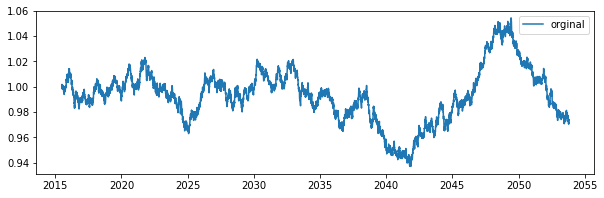

0.477327301402233


In [78]:
N = 9999
scalar = 10
# x = pd.Series(x, index=t)

# x = hurst.random_walk(N, proba=0.5)
t = pd.date_range('2015-07-01', periods=N, freq=BDay())

random_changes = 1. + np.random.randn(N) / 1000.
x = np.cumprod(random_changes)  # create a random walk from random changes
x = pd.Series(x, index=t)

pp = hurst.compute_Hc(x, kind='price', simplified=True)

plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

print(pp[0])

# Zad 1
Wersja biblioteczna

In [58]:
x.describe()

count    9999.000000
mean        0.919002
std         0.064218
min         0.823072
25%         0.858155
50%         0.909724
75%         0.990431
max         1.017948
dtype: float64

In [59]:
print(kurtosis(x, fisher=False))

1.3870927869849716


# Zad 2

In [80]:
# E = x.apply(lambda x : entropy(N, base=2)).reset_index()

E = entropy(x, base=2)
print(E)

13.287235065893412


In [81]:
# def hurst(input_ts, lags_to_test=[2, 100]):
#   tau = []
#   lagvec = []

#   # print(None is input_ts)
#   for lag in range(lags_to_test[0], lags_to_test[1]):
#     # pp = np.subtract(input_ts[lag:], input_ts[:-lag])
#     pp = input_ts[lag:] - input_ts[:-lag]
#     # print(pp)
#     # print(input_ts[:-lag])
#     # print(None is pp)
#     lagvec.append(lag)
#     tau.append(np.std(pp))

#   # print(lagvec)
#   # print(tau)

#   m = np.polyfit(lagvec, tau, 1)
#   return m[0]

# print(hurst(series))

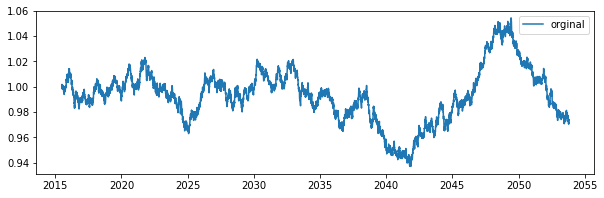

In [82]:
plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

In [83]:
# def vectorized_stride_v1(array, clearing_time_index, max_time, sub_window_size,
#                          stride_size):
#     start = clearing_time_index + 1 - sub_window_size + 1
    
#     sub_windows = (
#         start + 
#         np.expand_dims(np.arange(sub_window_size), 0) +
#         np.expand_dims(np.arange(max_time + 1), 0).T
#     )
    
#     # Fancy indexing to select every V rows.
#     return array[sub_windows[::stride_size]]


# def vectorized_stride_v2(array, clearing_time_index, max_time, sub_window_size,
#                          stride_size):
#     start = clearing_time_index + 1 - sub_window_size + 1
    
#     sub_windows = (
#         start + 
#         np.expand_dims(np.arange(sub_window_size), 0) +
#         # Create a rightmost vector as [0, V, 2V, ...].
#         np.expand_dims(np.arange(max_time + 1, step=stride_size), 0).T
#     )
    
#     return array[sub_windows]

In [64]:
# vectorized_stride_v2(x, )

In [85]:
# def rolling_window(seq, window_size):
#     it = iter(seq)
#     win = [it.next() for cnt in range(window_size)] # First window
#     yield win
#     for e in it: # Subsequent windows
#         win[:-1] = win[1:]
#         win[-1] = e
#         yield win

2015-07-01         NaN
2015-07-02         NaN
2015-07-03         NaN
2015-07-06         NaN
2015-07-07         NaN
                ...   
2053-10-21    0.971198
2053-10-22    0.971650
2053-10-23    0.972124
2053-10-24    0.972433
2053-10-27    0.972781
Freq: B, Length: 9999, dtype: float64

# Zad 3


In [ ]:
x.rolling(7).mean()

# Zad 4